In [154]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [155]:
import os
import shutil
from random import shuffle

def split_data(source_folder, train_folder, valid_folder, test_folder, train_ratio=0.7, valid_ratio=0.15):
    # Ensure the directory structure is correct and exists
    if not os.path.isdir(source_folder):
        print(f"Source folder {source_folder} does not exist.")
        return
    
    for category in os.listdir(source_folder):
        cat_dir = os.path.join(source_folder, category)
        if not os.path.isdir(cat_dir):
            continue  # Skip non-directory files
        
        images = os.listdir(cat_dir)
        shuffle(images)  # Randomize the order of images

        # Calculate split indices
        train_split = int(len(images) * train_ratio)
        valid_split = train_split + int(len(images) * valid_ratio)
        
        # Split images
        train_imgs = images[:train_split]
        valid_imgs = images[train_split:valid_split]
        test_imgs = images[valid_split:]
        
        # Function to copy images to their new location
        def move_imgs(img_list, destination):
            dest_path = os.path.join(destination, category)
            os.makedirs(dest_path, exist_ok=True)  # Create directory if it doesn't exist
            for img in img_list:
                src_path = os.path.join(cat_dir, img)
                shutil.move(src_path, os.path.join(dest_path, img))
        
        # Move images
        move_imgs(train_imgs, train_folder)
        move_imgs(valid_imgs, valid_folder)
        move_imgs(test_imgs, test_folder)
        
        print(f"Processed {category}: Train: {len(train_imgs)}, Valid: {len(valid_imgs)}, Test: {len(test_imgs)}")

# Define your directories
source_dir = "C:/Users/Borshon Alfred Gomes/Desktop/CVPR Project/DATASETS/Imagedata/ALLDATA"
train_dir = "C:/Users/Borshon Alfred Gomes/Desktop/CVPR Project/DATASETS/Imagedata/train"
valid_dir = "C:/Users/Borshon Alfred Gomes/Desktop/CVPR Project/DATASETS/Imagedata/valid"
test_dir = "C:/Users/Borshon Alfred Gomes/Desktop/CVPR Project/DATASETS/Imagedata/test"

# Split the data
split_data(source_dir, train_dir, valid_dir, test_dir)


Processed ABDULLAH AL SHAHRIAR: Train: 0, Valid: 0, Test: 0
Processed AHMED IMTIAZ: Train: 0, Valid: 0, Test: 0
Processed AL-NAFI: Train: 0, Valid: 0, Test: 0
Processed ARNAB BISHAKH SARKER: Train: 0, Valid: 0, Test: 0
Processed ASHA ISLAM: Train: 0, Valid: 0, Test: 0
Processed ASHIK AHAMED: Train: 0, Valid: 0, Test: 0
Processed BISHANATH TARAFDER: Train: 0, Valid: 0, Test: 0
Processed BORSHON ALFRED GOMES: Train: 0, Valid: 0, Test: 0
Processed ELMA ISLAM: Train: 0, Valid: 0, Test: 0
Processed ESM-E MOULA CHOWDHURY ABHA: Train: 0, Valid: 0, Test: 0
Processed FAHIM RAHMAN: Train: 0, Valid: 0, Test: 0
Processed FAIZA BINTE ZAMAN: Train: 0, Valid: 0, Test: 0
Processed IMAM HASAN JAMI: Train: 0, Valid: 0, Test: 0
Processed KHANDAKER AZNAN ALAM SEAM: Train: 0, Valid: 0, Test: 0
Processed MAHASHETAB HASSAN: Train: 0, Valid: 0, Test: 0
Processed MAHBUBUL ISLAM ABDULLAH: Train: 0, Valid: 0, Test: 0
Processed MAHFUZUR RAHMAN FERDOUS: Train: 0, Valid: 0, Test: 0
Processed MAHNAZ HOSSAIN: Train: 

In [156]:
DATA_DIR = 'C:/Users/Borshon Alfred Gomes/Desktop/CVPR Project/DATASETS/Imagedata'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'train')
VALID_DATA_DIR = os.path.join(DATA_DIR, 'valid')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'test')

In [157]:
IMG_SIZE = 300
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['ABDULLAH AL SHAHRIAR', 'AHMED IMTIAZ', 'AL-NAFI', 'ARNAB BISHAKH SARKER', 'ASHA ISLAM', 'ASHIK AHAMED', 'BISHANATH TARAFDER', 'BORSHON ALFRED GOMES', 'ELMA ISLAM', 'ESM-E MOULA CHOWDHURY ABHA', 'FAHIM RAHMAN', 'FAIZA BINTE ZAMAN', 'IMAM HASAN JAMI', 'KHANDAKER AZNAN ALAM SEAM', 'MAHASHETAB HASSAN', 'MAHBUBUL ISLAM ABDULLAH', 'MAHFUZUR RAHMAN FERDOUS', 'MAHNAZ HOSSAIN', 'MD ABID HASAN RAPPY', 'MD ABU ZAYED KHAN', 'MD ANAS KHAN', 'MD ASRAFUL KABIR SOHAN', 'MD ATIK ULLAH KHAN', 'MD FARDIN AMIN RIYAD', 'MD IMTIAJ ALAM SAJIN', 'MD JAHID HASSAN', 'MD MUNTASIR AREFIN NAEEM', 'MD MUSFIQUR RAHMAN', 'MD NAFIZ AHMED', 'MD NAIMUR RAHMAN', 'MD NAKIB MUNSIF', 'MD NAZMUL HASSAN BHUIYAN', 'MD RIFAT SHIKDAR', 'MD SAIFUR RAHMAN SADI', 'MD SAJID ISLAM KHAN', 'MD SHANZID HASAN', 'MD TANZIB HOSAIN', 'MD TAREK MAHMUD', 'MD TOYABUR RAHAMAN', 'MD WAHIDUZZAMAN SUVA', 'MOHAMMAD BIN AB JALIL SHEAKH', 'MOHAMMAD NUR', 'MOHAMMAD RAFIUL HAQUE', 'MOHAMMED TANVIR HASSAN', 'MOHIBUL ALAM ANANDA', 'MOMOTAZ YEASMIN', 'M

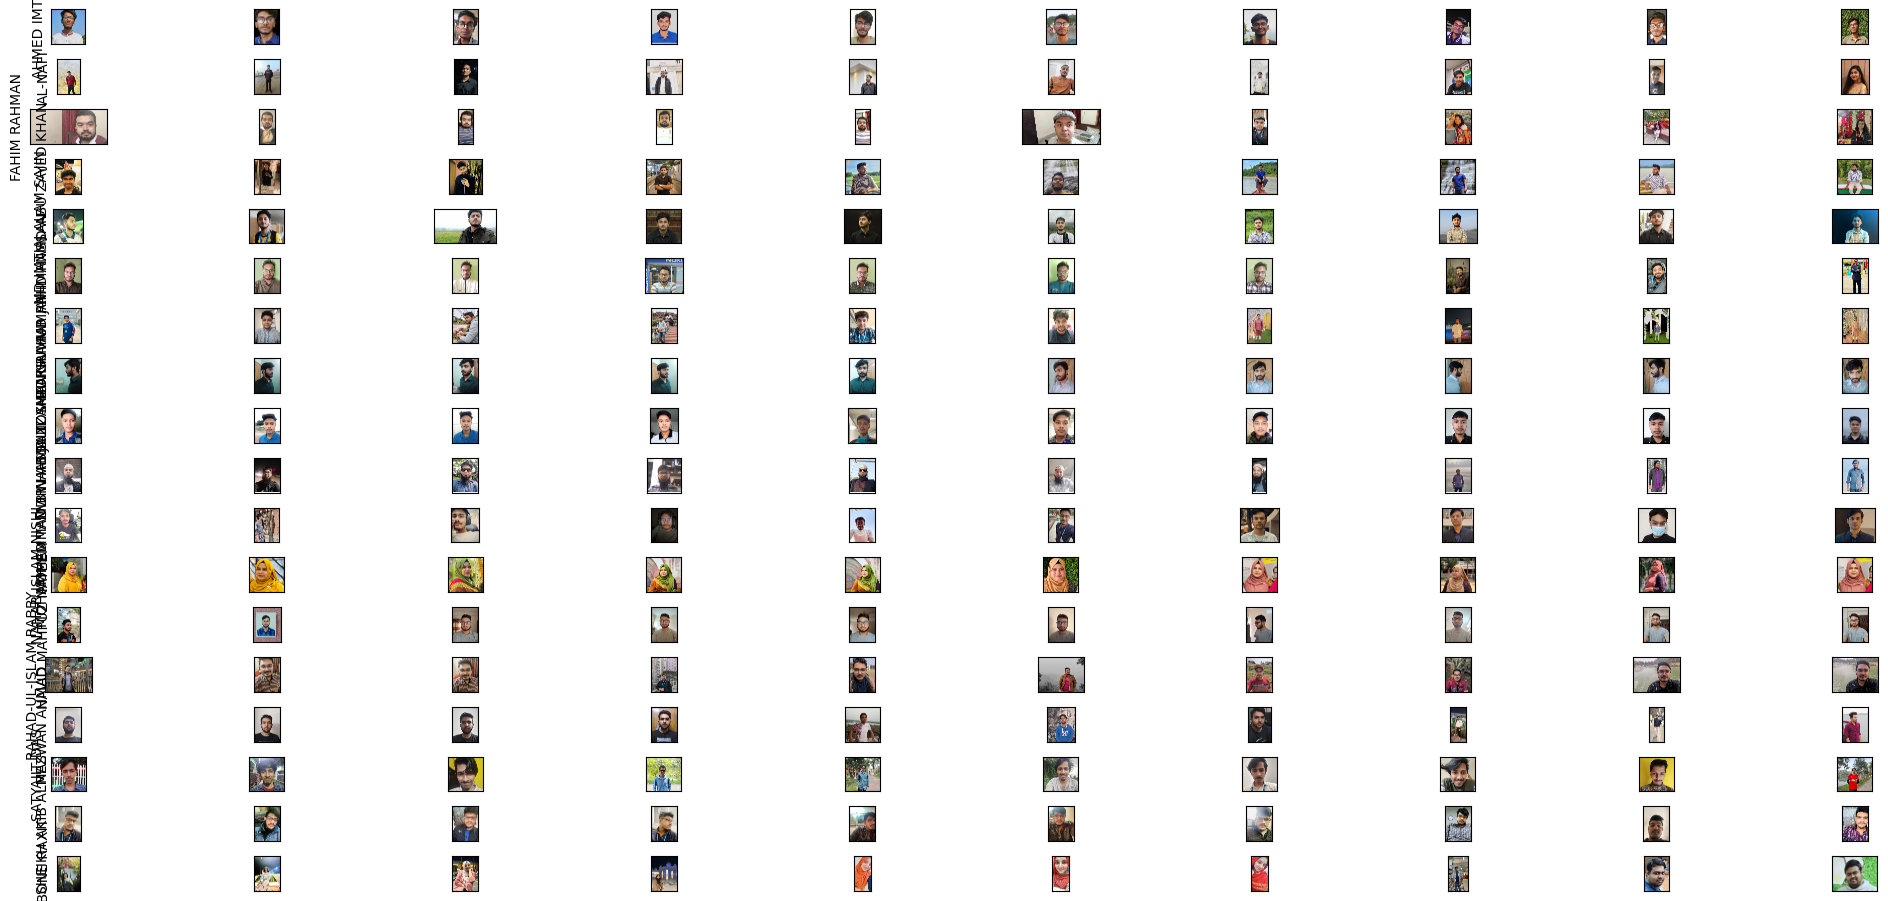

In [158]:
import cv2
import os
import matplotlib.pyplot as plt

fig_width = 10 * 2  
fig_height = 80 * 0.5 
plt.figure(figsize=(fig_width, fig_height))
i = 0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR, c)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_array = cv2.imread(img_path)
        if img_array is None:
            print(f"Warning: Could not read image {img_path}")
            continue
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.subplot(80, 10, i+1)
        plt.imshow(img_array)
        if i % 10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i % 10 == 0:
            break

plt.tight_layout()        
plt.show()


In [159]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c) # 'E:/DATASETS/classification/Face Mask Dataset/train/WithMask'
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            training_data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
        except Exception as e:
            pass
        
print(len(training_data))

0it [00:00, ?it/s]
100%|██████████| 8/8 [00:00<00:00, 38.01it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 2/2 [00:00<00:00, 188.27it/s]
0it [00:00, ?it/s]
100%|██████████| 7/7 [00:00<00:00, 25.47it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 7/7 [00:00<00:00, 31.57it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 18/18 [00:01<00:00, 16.80it/s]
0it [00:00, ?it/s]
100%|██████████| 7/7 [00:00<00:00, 32.41it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 7/7 [00:00<00:00, 13.05it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 7/7 [00:00<00:00, 7003.85it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 7/7 [00:00<00:00, 14.07it/s]
0it [00:00, ?it/s]
100%|██████████| 7/7 [00:00<00:00, 11.38it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100

309


In [160]:
valid_data = []

for c in CATEGORIES:
    path = os.path.join(VALID_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            valid_data.append([img_resized, class_num])
        except Exception as e:
            pass
        
print(len(valid_data))

0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 998.64it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 124.96it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 33.32it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 999.36it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3/3 [00:00<00:00, 25.77it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 23.80it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 55.54it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 1000.31it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 21.50it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00,  7.27it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it

54


In [161]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            test_data.append([img_resized, class_num])
        except Exception as e:
            pass
        
print(len(test_data))

100%|██████████| 3/3 [00:00<00:00, 11.88it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<?, ?it/s]

92


In [162]:
random.shuffle(training_data)
random.shuffle(valid_data)
random.shuffle(test_data)

In [163]:
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,300,300,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (309, 300, 300, 3) Y_train= (309,)


In [164]:
X_valid = []
Y_valid = []

for img, label in valid_data:
    X_valid.append(img)
    Y_valid.append(label)
    
X_valid = np.array(X_valid).astype('float32').reshape(-1,300,300,3)
Y_valid = np.array(Y_valid)

print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")

X_valid= (54, 300, 300, 3) Y_valid= (54,)


In [165]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (92, 300, 300, 3) Y_test= (92,)


In [166]:
pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()

pickle_out = open("X_valid.pickle","wb")
pickle.dump(X_valid, pickle_out)
pickle_out.close()

pickle_out = open("Y_valid.pickle","wb")
pickle.dump(Y_valid, pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

In [167]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [168]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(309, 300, 300, 3) (309,)
(92, 300, 300, 3) (92,)


In [169]:
class_names = CATEGORIES

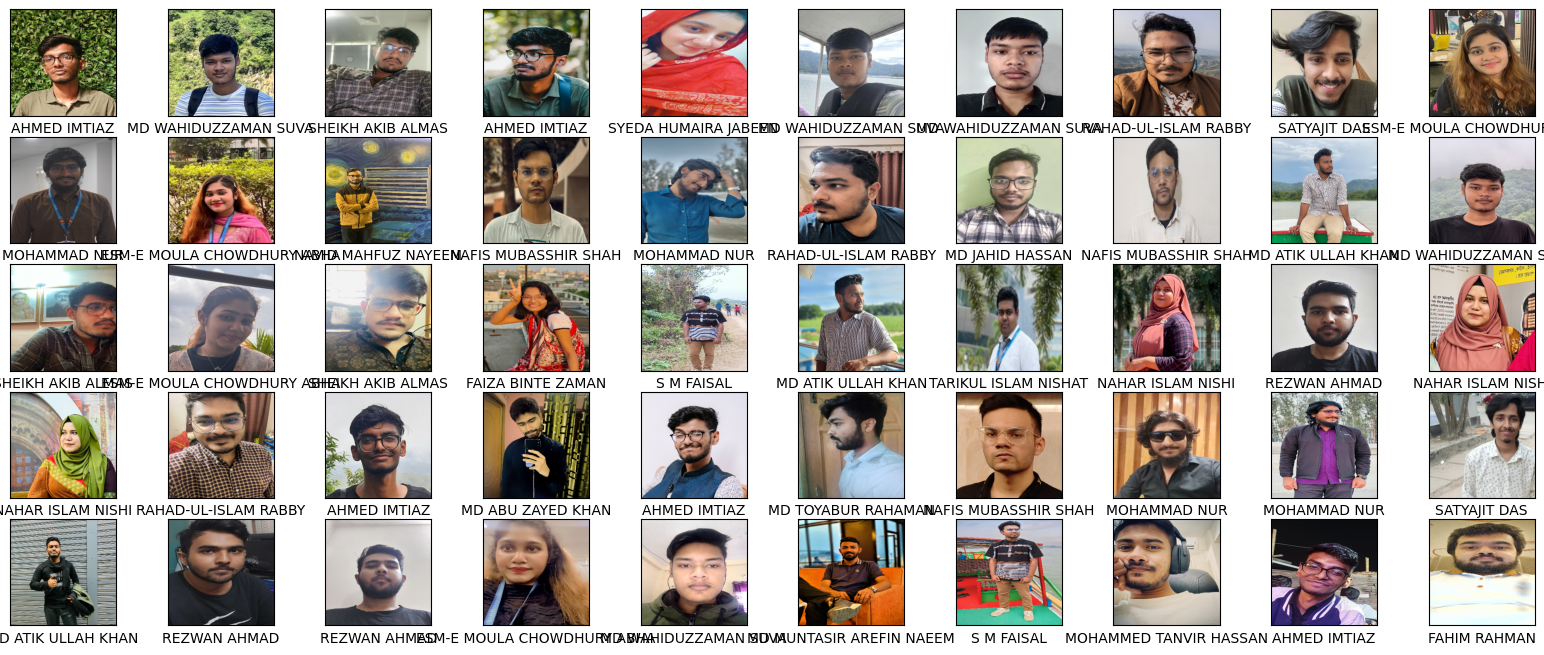

In [170]:
plt.figure(figsize=(20, 8))

for i in range(50):
    plt.subplot(5, 10, i + 1)
    # Convert each image from BGR to RGB format within the loop
    image_rgb = X_train[i][..., ::-1]
    
    plt.imshow(image_rgb.astype('uint8'))  # Display the correctly converted image
    plt.xticks([])
    plt.yticks([])
    # Use the label for the current image
    plt.xlabel(class_names[Y_train[i]])

plt.show()


In [188]:
model = keras.Sequential([
    keras.Input(shape=(300, 300, 3)),  # Assuming images are resized to 300x300 pixels
    
    ## Hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## Output layer - adjusted to have 31 units, one for each class
    layers.Dense(77, activation='softmax')
])
model.summary()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 296, 296, 32)      2432      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 78400)           

In [189]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [190]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=78)


Epoch 1/5
4/4 [==============================] - 6s 1s/step - loss: 356.9506 - accuracy: 0.0000e+00 - val_loss: 24.1029 - val_accuracy: 0.0000e+00
Epoch 2/5
4/4 [==============================] - 6s 1s/step - loss: 15.2353 - accuracy: 0.0243 - val_loss: 4.2505 - val_accuracy: 0.0323
Epoch 3/5
4/4 [==============================] - 6s 1s/step - loss: 4.3716 - accuracy: 0.0283 - val_loss: 4.3552 - val_accuracy: 0.0484
Epoch 4/5
4/4 [==============================] - 6s 1s/step - loss: 4.2688 - accuracy: 0.0526 - val_loss: 4.6971 - val_accuracy: 0.0161
Epoch 5/5
4/4 [==============================] - 6s 1s/step - loss: 4.1665 - accuracy: 0.0607 - val_loss: 4.2503 - val_accuracy: 0.0323


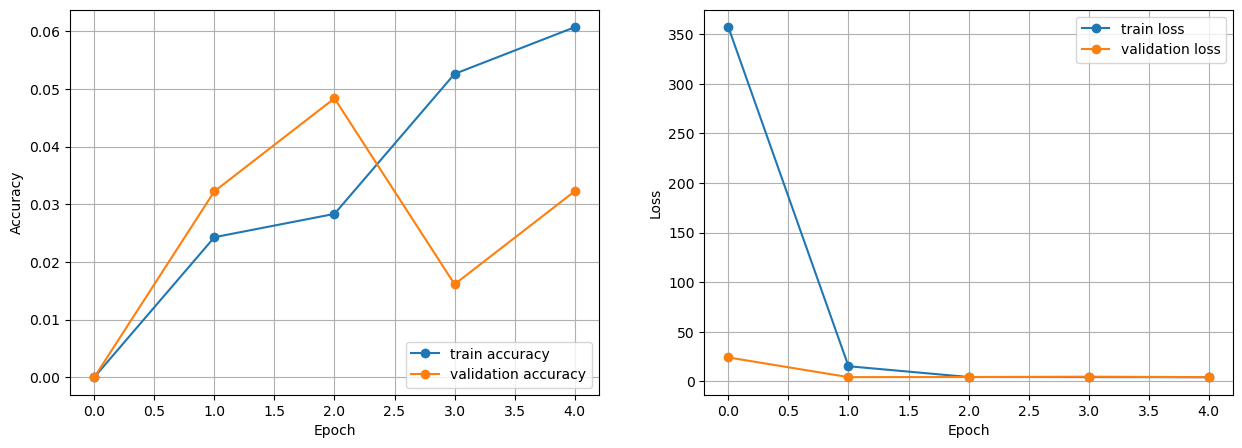

In [191]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [192]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

3/3 [==============================] - 0s 134ms/step - loss: 4.2334 - accuracy: 0.0435

Test Accuracy: 0.043478261679410934

Test Loss: 4.233352184295654


In [193]:
predictions = model.predict(X_test)

In [194]:
predictions[0]

array([0.00216704, 0.07655916, 0.00842462, 0.00108298, 0.01413203,
       0.0069616 , 0.0138746 , 0.00232554, 0.03040511, 0.01653125,
       0.01342494, 0.01275533, 0.0120713 , 0.00901595, 0.00111308,
       0.00078994, 0.01761427, 0.00153068, 0.00358408, 0.0379361 ,
       0.01271711, 0.00402085, 0.00879191, 0.0028604 , 0.01119033,
       0.00589724, 0.01012414, 0.03403679, 0.03700081, 0.00249268,
       0.00909701, 0.00275649, 0.00765299, 0.00505341, 0.04253037,
       0.00190735, 0.00596863, 0.00461758, 0.02162332, 0.00853898,
       0.00379118, 0.02874255, 0.00710446, 0.04866029, 0.01845749,
       0.00218809, 0.00042452, 0.01142557, 0.00389638, 0.05334671,
       0.06735369, 0.00823899, 0.00524607, 0.00315298, 0.00129834,
       0.01935141, 0.03067585, 0.00273879, 0.00486242, 0.0104758 ,
       0.00410382, 0.01036879, 0.00474719, 0.00656798, 0.00302192,
       0.02510553, 0.0237486 , 0.007304  , 0.00769491, 0.01515801,
       0.00590811, 0.00057818, 0.00499032, 0.01759505, 0.00300

In [195]:
np.argmax(predictions[0])

1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IndexError: invalid index to scalar variable.

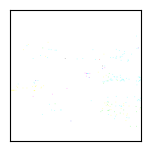

In [196]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()
